## Churn For Bank Customer

**As we know, it is much more expensive to sign in a new client than keeping an existing one.**

**It is advantageous for banks to know what leads a client towards the decision to leave the company.**

**Churn prevention allows companies to develop loyalty programs and retention campaigns to keep as many customers as possible.**

### Content:

<body>
    <h3>Dataset columns and definition</h3>
	<table>
		<thead>
			<tr>
                <th><u>Feature</u></th>
                <th><u>Description</u></th>
			</tr>
		</thead>
		<tbody>
			<tr>
				<td>RowNumber</td>
				<td>corresponds to the record (row) number and has no effect on the output.</td>
			</tr>
			<tr>
				<td>CustomerId</td>
				<td>contains random values and has no effect on customer leaving the bank.</td>
			</tr>
			<tr>
				<td>Surname</td>
				<td>the surname of a customer has no impact on their decision to leave the bank.</td>
			</tr>
			<tr>
				<td>CreditScore</td>
				<td>can have an effect on customer churn, since a customer with a higher credit score is less likely to leave the bank.</td>
			</tr>
			<tr>
				<td>Geography</td>
				<td>A customer’s location can affect their decision to leave the bank.</td>
			</tr>
			<tr>
				<td>Gender</td>
				<td>it’s interesting to explore whether gender plays a role in a customer leaving the bank.</td>
			</tr>
			<tr>
				<td>Age</td>
				<td>This is certainly relevant, since older customers are less likely to leave their bank than younger ones.</td>
			</tr>
			<tr>
				<td>Tenure</td>
				<td>refers to the number of years that the customer has been a client of the bank. Normally, older clients are more loyal and less likely to leave a bank.</td>
			</tr>
			<tr>
				<td>Balance</td>
				<td>also a very good indicator of customer churn, as people with a higher balance in their accounts are less likely to leave the bank compared to those with lower balances.</td>
			</tr>
			<tr>
				<td>NumOfProducts</td>
				<td>refers to the number of products that a customer has purchased through the bank.</td>
			</tr>
			<tr>
				<td>HasCrCard</td>
				<td>denotes whether or not a customer has a credit card. This column is also relevant, since people with a credit card are less likely to leave the bank.</td>
			</tr>
			<tr>
				<td>IsActiveMember</td>
				<td>active customers are less likely to leave the bank.</td>
			</tr>
			<tr>
				<td>EstimatedSalary</td>
				<td>as with balance, people with lower salaries are more likely to leave the bank compared to those with higher salaries.</td>
			</tr>
			<tr>
				<td>Exited</td>
				<td>whether or not the customer left the bank.</td>
			</tr>
        </tbody>
	</table>
</body>

### Predicting customer churn is a common problem in the banking and financial industry, and you can approach it using various machine learning algorithms.  

**Steps for Predicting Customer Churn:**  

### Data Preprocessing:

1. Remove irrelevant columns like RowNumber, CustomerId, and Surname as they don't impact churn prediction.  
2. Encode categorical variables like Geography and Gender into numerical values using techniques like one-hot encoding.  
3. Handle missing data, if any.  
4. Split the data into training and testing sets.  

### Exploratory Data Analysis (EDA):

1. Explore the dataset to gain insights and understand the distribution of variables.  
2. Visualize data to identify patterns and correlations between features and the target variable (Exited).  

### Feature Engineering:

1. Create new features if they are relevant. For example, you can create a feature that represents the customer's age group.  
2. Scale or normalize numeric features like CreditScore, Age, Tenure, Balance, and EstimatedSalary to ensure they have a similar impact on the model.

### Select Suitable Algorithms:

Binary classification algorithms are appropriate for this problem because the target variable (Exited) is binary (0 or 1).

**Suitable algorithms to consider include:**  

1. Logistic Regression  
2. Random Forest  
3. Gradient Boosting    
4. Decision Tree    

### Train and Evaluate Models:

1. Train multiple models with your training data using cross-validation.  
2. Evaluate models using appropriate metrics like accuracy, precision, recall, F1-score, and ROC-AUC.  
3. Choose the model with the best performance on the validation data.  

### Hyperparameter Tuning:

1. Fine-tune hyperparameters of the selected model(s) using techniques like grid search or random search.


***The choice of algorithm depends on the dataset size, complexity, and available computational resources. Logistic Regression is a good starting point due to its simplicity and interpretability. You can then explore more complex algorithms like Random Forest or Gradient Boosting for potentially better performance.***  

***Remember that the choice of features, data preprocessing steps, and model evaluation metrics should be tailored to the specific characteristics of your dataset and business goals.***

In [94]:
# Imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn import metrics
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFE
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import VarianceThreshold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [95]:
#Reading the data

df = pd.read_csv(r"C:\Users\ASUS\Downloads\churn.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [96]:
df.shape

(10000, 14)

In [97]:
#Checking null values

df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

We can see that we have no null values in our dataset.

In [98]:
#Checking columns Name
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [99]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [100]:
#Checking summary of the data set.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [101]:
#Dropping irrelevant columns like RowNumber, CustomerId, and Surname as they don't impact churn prediction.

df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis = 1)
#print(df)

In [102]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [103]:
colname = []
for x in df.columns:
    if df[x].dtype=="object":
        colname.append(x)
colname

['Geography', 'Gender']

In [104]:
#Converting categorical to numerical

df = pd.get_dummies(df, columns=['Geography', 'Gender'])
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0


In [105]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0


In [106]:
#Separating into features variables and target variable.

X = df.drop(columns=['Exited'])  # Features
y = df['Exited']  # Target variable
print(y.shape)
print(X.shape)

(10000,)
(10000, 13)


In [107]:
# Separating Independent and Label data

print(f"Shape of Independent Data :{X.shape}")
print(f"Shape of Label Data :{y.shape}")

# Splitting the data into training and testing datasets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Shape of X_train is {X_train.shape}")
print(f"Shape of y_train is {y_train.shape}")
print(f"Shape of X_test is {X_test.shape}")
print(f"Shape of y_test is {y_test.shape}")

Shape of Independent Data :(10000, 13)
Shape of Label Data :(10000,)
Shape of X_train is (8000, 13)
Shape of y_train is (8000,)
Shape of X_test is (2000, 13)
Shape of y_test is (2000,)


### EDA

**Corelation between variables**

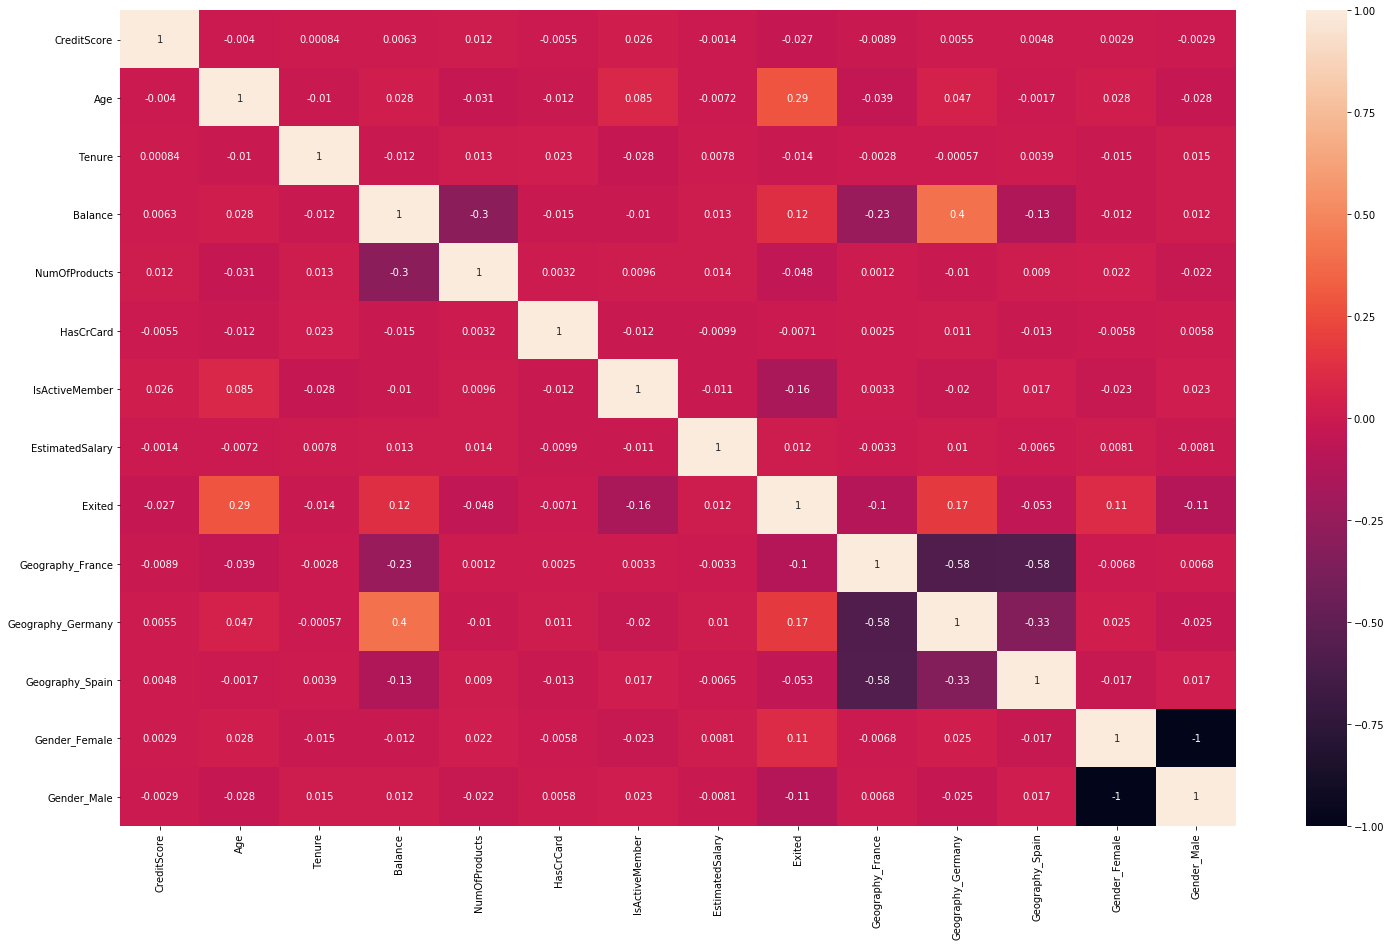

In [108]:
#Assumption of no multicollinearity: there should be no multicollinearity Between the independ variables.
#Multicollinarity is the relationship amomg the independent variables.

corr_df = df.corr(method="pearson")
plt.figure(figsize = (25,15))
#print(corr_df)

sns.heatmap(corr_df,vmax=1.0,vmin=-1.0,annot=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020D90BBFFC8>,
      dtype=object)

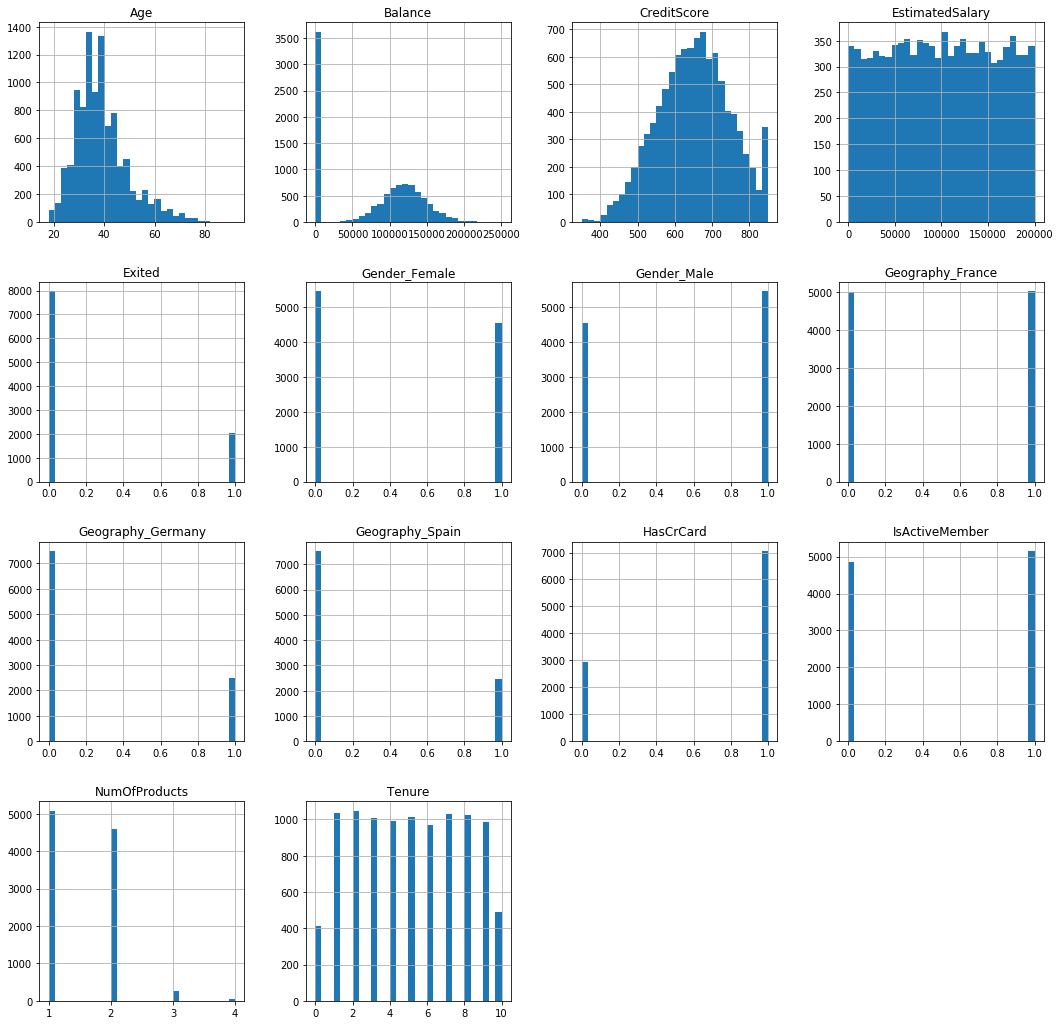

In [109]:
df.hist(figsize = (18, 18), bins = 30)

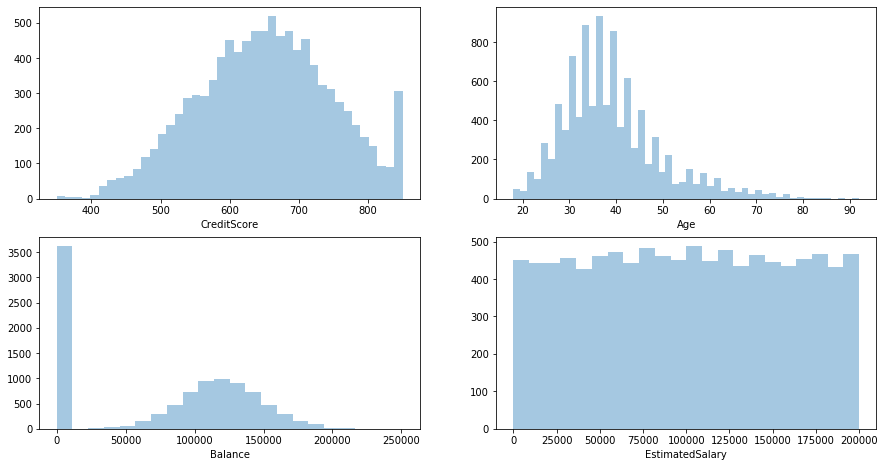

In [110]:
plt.figure(figsize = (15, 12))

#3: This specifies the total number of rows in the grid of subplots.
#2: This specifies the total number of columns in the grid of subplots.
#1: This specifies the index of the current subplot.

plt.subplot(3, 2, 1)
sns.distplot(df['CreditScore'], kde = False)

plt.subplot(3, 2, 2)
sns.distplot(df['Age'], kde = False)

plt.subplot(3, 2, 3)
sns.distplot(df['Balance'], kde = False)

plt.subplot(3, 2, 4)
sns.distplot(df['EstimatedSalary'], kde = False)

Salary we can see that we have practically the same number of people for each salary range.

When we look at the balance variable we can see that most of our data are from people who don't have money in their accounts, and those who have it are fine balanced.

In [167]:
df.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Geography_France',
       'Geography_Germany', 'Geography_Spain', 'Gender_Female', 'Gender_Male',
       'AgeGroup'],
      dtype='object')

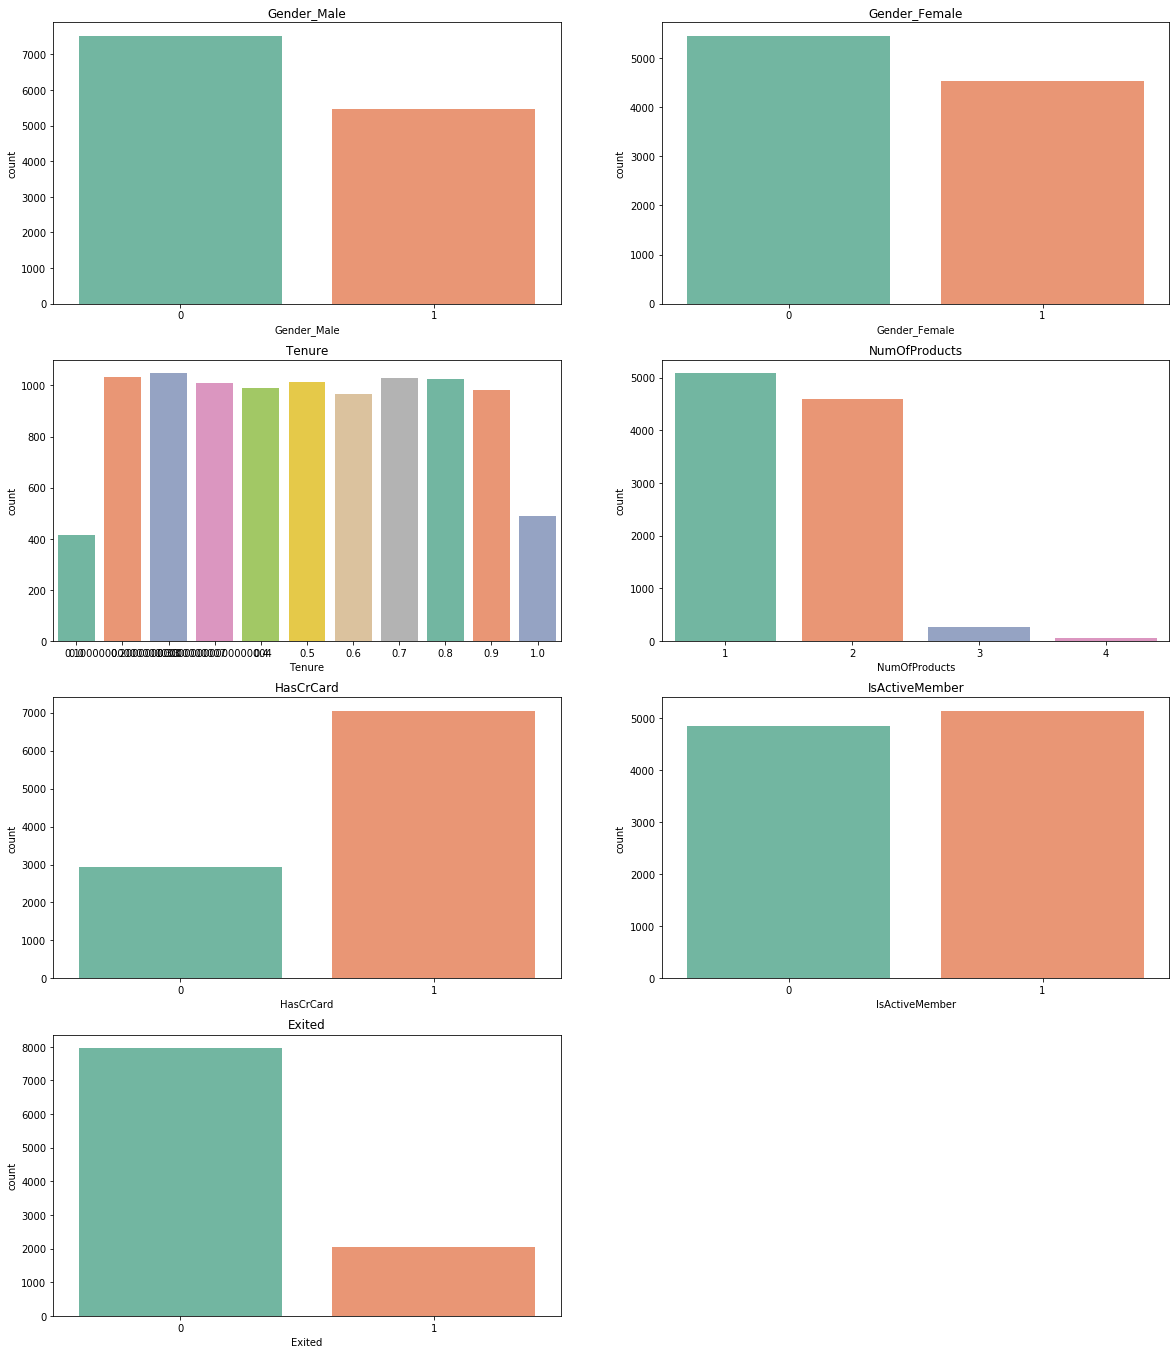

In [170]:
plt.figure(figsize = (20, 30))

plt.subplot(5, 2, 1) #5 rows and 2 columns,
plt.gca().set_title('Geography_Spain') #get current axes

#This parameter sets the color palette for the countplot.
#The specific color palette 'Set2' is used to distinguish the different categories in the plot.
sns.countplot(x = 'Geography_Spain', palette = 'Set2', data = df)

plt.subplot(5, 2, 1)
plt.gca().set_title('Gender_Male')
sns.countplot(x = 'Gender_Male', palette = 'Set2', data = df)

plt.subplot(5, 2, 2)
plt.gca().set_title('Gender_Female')
sns.countplot(x = 'Gender_Female', palette = 'Set2', data = df)

plt.subplot(5, 2, 3)
plt.gca().set_title('Tenure')
sns.countplot(x = 'Tenure', palette = 'Set2', data = df)

plt.subplot(5, 2, 4)
plt.gca().set_title('NumOfProducts')
sns.countplot(x = 'NumOfProducts', palette = 'Set2', data = df)

plt.subplot(5, 2, 5)
plt.gca().set_title('HasCrCard')
sns.countplot(x = 'HasCrCard', palette = 'Set2', data = df)

plt.subplot(5, 2, 6)
plt.gca().set_title('IsActiveMember')
sns.countplot(x = 'IsActiveMember', palette = 'Set2', data = df)

plt.subplot(5, 2, 7)
plt.gca().set_title('Exited')
sns.countplot(x = 'Exited', palette = 'Set2', data = df)

Looking at the boxplots of our continuous variables, we can see that we have a few outliers; for now, we will leave them.

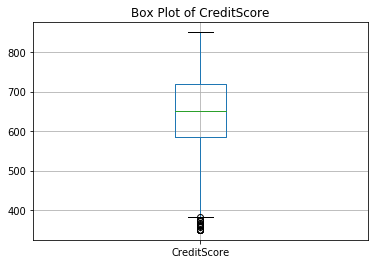

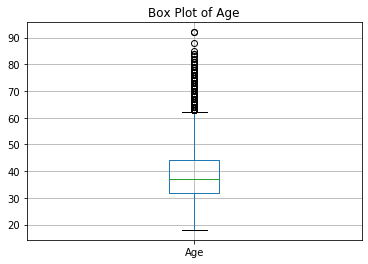

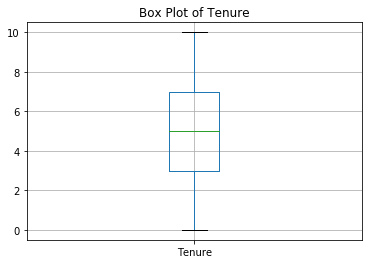

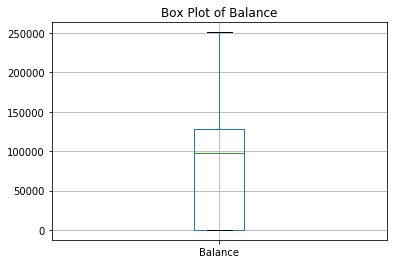

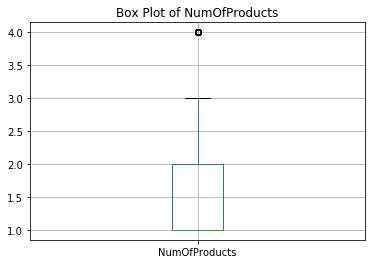

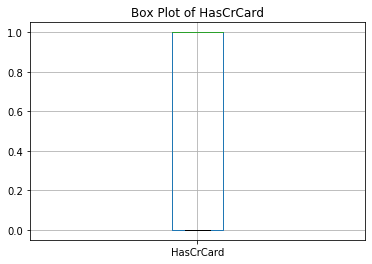

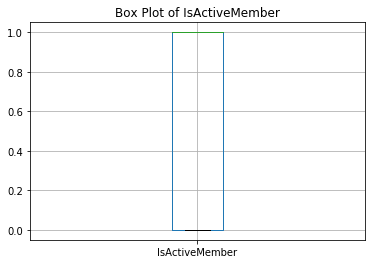

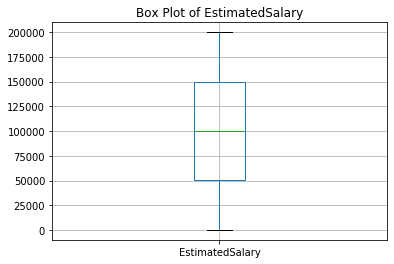

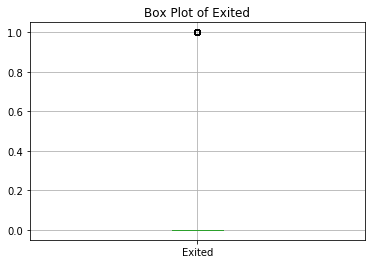

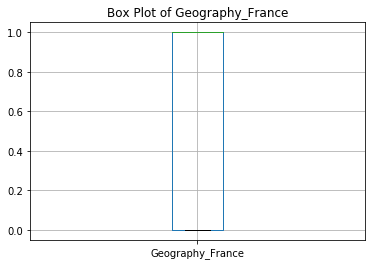

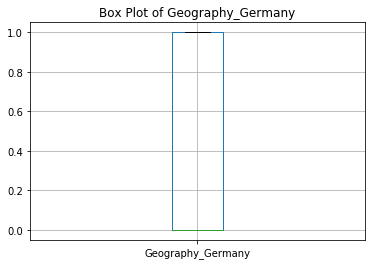

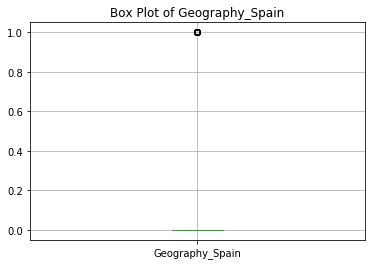

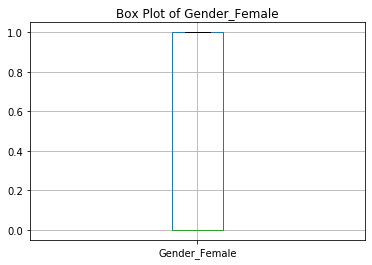

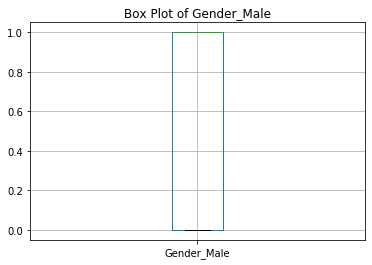

In [112]:
#Checking for outliers

numerical_columns = df.select_dtypes(include=['number'])

# Create box plots for each numerical column
for column in numerical_columns.columns:
    df.boxplot(column=column)
    plt.title(f'Box Plot of {column}')
    plt.show()
    
#logically relevent values should not be consider as outliers.
#When outliers are detected as cluster of points do not treat them.

A very important thing is that we see that our target variable is not well distributed, we will probably have to balance the class.

### Feature Engineering

In [113]:
from sklearn.preprocessing import MinMaxScaler

df = pd.DataFrame(df)

# Create a new feature 'AgeGroup' based on age ranges
# You can customize the age ranges as needed
bins = [18, 30, 40, 50, 60, 100]
labels = ['18-30', '31-40', '41-50', '51-60', '61+']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels)

# Specify which numeric features to scale or normalize
numeric_features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']

# Standardize numeric features using StandardScaler
scaler_standard = StandardScaler()
df[numeric_features] = scaler_standard.fit_transform(df[numeric_features])

# Normalize numeric features using MinMaxScaler
scaler_minmax = MinMaxScaler()
df[numeric_features] = scaler_minmax.fit_transform(df[numeric_features])

# Display the modified DataFrame
print(df)

      CreditScore       Age  Tenure   Balance  NumOfProducts  HasCrCard  \
0           0.538  0.324324     0.2  0.000000              1          1   
1           0.516  0.310811     0.1  0.334031              1          0   
2           0.304  0.324324     0.8  0.636357              3          1   
3           0.698  0.283784     0.1  0.000000              2          0   
4           1.000  0.337838     0.2  0.500246              1          1   
...           ...       ...     ...       ...            ...        ...   
9995        0.842  0.283784     0.5  0.000000              2          1   
9996        0.332  0.229730     1.0  0.228657              1          1   
9997        0.718  0.243243     0.7  0.000000              1          0   
9998        0.844  0.324324     0.3  0.299226              2          1   
9999        0.884  0.135135     0.4  0.518708              1          1   

      IsActiveMember  EstimatedSalary  Exited  Geography_France  \
0                  1         0.5

In [114]:
# Creating a function that trains, predicts and returns accuracy, recall confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

def Train_Predict(model, X_train, X_test, y_train, y_test):
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)

  print(f"Confusuion Matrix")

  cfm = confusion_matrix(y_test,y_pred)
  print(cfm)
  print("===================================================")
  print("Classification report")

  print(classification_report(y_test,y_pred))

  print("====================================================")
  acc = accuracy_score(y_test,y_pred)
  print("Accuracy of the model: ", acc)

  return y_pred

### Logistic Regression Model

In [115]:
from sklearn.linear_model import LogisticRegression
model_LogisticRegression=LogisticRegression()
Train_Predict(model_LogisticRegression, X_train, X_test, y_train, y_test)

Confusuion Matrix
[[1573   34]
 [ 365   28]]
Classification report
              precision    recall  f1-score   support

           0       0.81      0.98      0.89      1607
           1       0.45      0.07      0.12       393

    accuracy                           0.80      2000
   macro avg       0.63      0.53      0.51      2000
weighted avg       0.74      0.80      0.74      2000

Accuracy of the model:  0.8005


array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [116]:
print(y_pred.shape)
print(y_test.shape)

(2000,)
(2000,)


### Adjustment Of Threshold

In [117]:
y_pred_proba = classifier.predict_proba(X_test)
y_pred_proba

array([[0.96, 0.04],
       [1.  , 0.  ],
       [0.82, 0.18],
       ...,
       [0.29, 0.71],
       [0.93, 0.07],
       [0.48, 0.52]])

In [118]:
for a in np.arange(0.4,0.61,0.01):
    predict_mine = np.where(y_pred_proba[:,1] > a, 1, 0)
    cfm=confusion_matrix(y_test, predict_mine)
    total_err=cfm[0,1]+cfm[1,0]
    print("Errors at threshold ", a, ":",total_err, " , type 2 error :",
          cfm[1,0]," , type 1 error:", cfm[0,1])

#While fixing the best threshold the focus should be on minimizing the total error compare to 0.5 threshhold
#out of those thresholds which show a lower error we should try chosing such a threshold where the type 2 error is lower
#priority should be given to Total error then type 2 error

Errors at threshold  0.4 : 281  , type 2 error : 174  , type 1 error: 107
Errors at threshold  0.41000000000000003 : 273  , type 2 error : 177  , type 1 error: 96
Errors at threshold  0.42000000000000004 : 273  , type 2 error : 180  , type 1 error: 93
Errors at threshold  0.43000000000000005 : 271  , type 2 error : 185  , type 1 error: 86
Errors at threshold  0.44000000000000006 : 267  , type 2 error : 188  , type 1 error: 79
Errors at threshold  0.45000000000000007 : 268  , type 2 error : 193  , type 1 error: 75
Errors at threshold  0.4600000000000001 : 267  , type 2 error : 196  , type 1 error: 71
Errors at threshold  0.4700000000000001 : 270  , type 2 error : 200  , type 1 error: 70
Errors at threshold  0.4800000000000001 : 271  , type 2 error : 204  , type 1 error: 67
Errors at threshold  0.4900000000000001 : 271  , type 2 error : 208  , type 1 error: 63
Errors at threshold  0.5000000000000001 : 269  , type 2 error : 211  , type 1 error: 58
Errors at threshold  0.5100000000000001 :

In [119]:
y_pred_class=[]
for value in y_pred_proba[:,1]:
    if value>0.4 :
        y_pred_class.append(1)
    else:
        y_pred_class.append(0)
#print(y_pred_class)

In [154]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(y_test,y_pred_class)
print(cfm)
print("=====================================================")
print("Classification report: ")

print(classification_report(y_test,y_pred_class))

print("=====================================================")
acc=accuracy_score(y_test, y_pred_class)
print("Accuracy of the model: ",acc)

[[1500  107]
 [ 174  219]]
Classification report: 
              precision    recall  f1-score   support

           0       0.90      0.93      0.91      1607
           1       0.67      0.56      0.61       393

    accuracy                           0.86      2000
   macro avg       0.78      0.75      0.76      2000
weighted avg       0.85      0.86      0.85      2000

Accuracy of the model:  0.8595


### SMOTE
**SMOTE, short for "Synthetic Minority Over-sampling Technique is a valuable technique for handling class imbalance in classification problems by generating synthetic samples for the minority class, improving the overall balance of the dataset, and enhancing the model's ability to correctly classify minority class instances.**

In [121]:
print("Before OverSampling, counts of label '1': ", (sum(y_train == 1)))
print("Before OverSampling, counts of label '0': ", (sum(y_train == 0)))

# import SMOTE from imblearn library
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 10,k_neighbors=5)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

print('After OverSampling, the shape of train_X: ', (X_train_res.shape))
print('After OverSampling, the shape of train_y: ', (y_train_res.shape))

print("After OverSampling, counts of label '1': ", (sum(y_train_res == 1)))
print("After OverSampling, counts of label '0': ", (sum(y_train_res == 0)))

Before OverSampling, counts of label '1':  1644
Before OverSampling, counts of label '0':  6356
After OverSampling, the shape of train_X:  (12712, 13)
After OverSampling, the shape of train_y:  (12712,)
After OverSampling, counts of label '1':  6356
After OverSampling, counts of label '0':  6356


### Logistic Regression Using SMOTE

In [122]:
model_LogisticRegression=LogisticRegression()
Train_Predict(model_LogisticRegression, X_train_res, X_test, y_train_res, y_test)

Confusuion Matrix
[[994 613]
 [123 270]]
Classification report
              precision    recall  f1-score   support

           0       0.89      0.62      0.73      1607
           1       0.31      0.69      0.42       393

    accuracy                           0.63      2000
   macro avg       0.60      0.65      0.58      2000
weighted avg       0.78      0.63      0.67      2000

Accuracy of the model:  0.632


array([0, 0, 1, ..., 0, 0, 1], dtype=int64)

### Decision Tree

In [147]:
Decision_Tree_Classifier = DecisionTreeClassifier()
Train_Predict(Decision_Tree_Classifier, X_train_res, X_test, y_train_res, y_test)

Confusuion Matrix
[[1350  257]
 [ 178  215]]
Classification report
              precision    recall  f1-score   support

           0       0.88      0.84      0.86      1607
           1       0.46      0.55      0.50       393

    accuracy                           0.78      2000
   macro avg       0.67      0.69      0.68      2000
weighted avg       0.80      0.78      0.79      2000

Accuracy of the model:  0.7825


array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

### Pruning decision Tree

In [148]:
#predicting using the Decision_Tree_Classifier

from sklearn.tree import DecisionTreeClassifier


model_DecisionTree = DecisionTreeClassifier(criterion='gini', 
                                            random_state =12, 
                                            splitter='best', 
                                            min_samples_leaf = 3, 
                                            min_samples_split = 6, 
                                            max_depth = 10)

# splitter :- default value of splitter is best it will take the best value which will make best homoginas node and other value is random it will pick random number
# min_samples_leaf :- make the leaf only if there are 3 or more the 3 observation :-value passed is 3 :-3 sample in dt
# min_samples_split :- if node has minimum 6 observation then on splet that node :- value passed is 6 :- 6 sample in dt
# max_depth :- max nodes/leaf in the tree :- the depth of tree will be 10 :- value passed is 10

#fit the model ion the data and predict the values

model_DecisionTree.fit(X_train,y_train)
Y_pred = model_DecisionTree.predict(X_test)

#print(Y_pred)
#print(list(zip(y_test,Y_pred)))

In [155]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(y_test,Y_pred)
print(cfm)
print("===================================================")

print("Classification report: ")

print(classification_report(y_test,Y_pred))

print("===================================================")
acc=accuracy_score(y_test, Y_pred)
print("Accuracy of the model: ",acc)

[[1483  124]
 [ 196  197]]
Classification report: 
              precision    recall  f1-score   support

           0       0.88      0.92      0.90      1607
           1       0.61      0.50      0.55       393

    accuracy                           0.84      2000
   macro avg       0.75      0.71      0.73      2000
weighted avg       0.83      0.84      0.83      2000

Accuracy of the model:  0.84


### Random Forest 

In [126]:
from sklearn.ensemble import RandomForestClassifier

model_Random_Forest=RandomForestClassifier()
Train_Predict(model_Random_Forest, X_train, X_test, y_train, y_test)

Confusuion Matrix
[[1550   57]
 [ 207  186]]
Classification report
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.77      0.47      0.58       393

    accuracy                           0.87      2000
   macro avg       0.82      0.72      0.75      2000
weighted avg       0.86      0.87      0.86      2000

Accuracy of the model:  0.868


array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

### Gradient Boosting Classifier

In [142]:
from sklearn.ensemble import GradientBoostingClassifier

model_GradientBoost=GradientBoostingClassifier()
Train_Predict(model_GradientBoost, X_train, X_test, y_train, y_test)

Confusuion Matrix
[[1542   65]
 [ 207  186]]
Classification report
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.74      0.47      0.58       393

    accuracy                           0.86      2000
   macro avg       0.81      0.72      0.75      2000
weighted avg       0.85      0.86      0.85      2000

Accuracy of the model:  0.864


array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

### Gradient Boosting Classifier Using SMOTE

In [143]:
model_Gradient_Boost = GradientBoostingClassifier()
Train_Predict(model_Gradient_Boost, X_train_res, X_test, y_train_res, y_test)

Confusuion Matrix
[[1472  135]
 [ 163  230]]
Classification report
              precision    recall  f1-score   support

           0       0.90      0.92      0.91      1607
           1       0.63      0.59      0.61       393

    accuracy                           0.85      2000
   macro avg       0.77      0.75      0.76      2000
weighted avg       0.85      0.85      0.85      2000

Accuracy of the model:  0.851


array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

### -------------------------------------------------------------------------------------------------------------------------------------------------------------------

### Evaluation Metrics Table

<head>
	<title>Metrics Summary</title>
	<style>
		table td {
			text-align:center;
		}
	</style>
</head>
<body>
	<table>
		<thead>
			<tr>
                <th><u>Metrics</u></th>
                <th><u>Classes</u></th>
				<th>LogisticRegression</th>
				<th>DecisionTree</th>
                <th>RandomForest</th>
                <th>GradientBoosting</th>
			</tr>
		</thead>
		<tbody>
			<tr>
				<td>Accuracy</td>
				<td>-</td>
				<td>85.95%</td>
				<td>78.25%</td>
				<td>86.80%</td>
				<td>85.10%</td>
			</tr>
			<tr>
				<td>Precision</td>
				<td>class 0</td>
				<td>0.90</td>
				<td>0.88</td>
				<td>0.88</td>
				<td>0.90</td>
			</tr>
			<tr>
				<td>-</td>
				<td>class 1</td>
				<td>0.67</td>
				<td>0.46</td>
				<td>0.77</td>
				<td>0.63</td>
			</tr>
			<tr>
				<td>Recall</td>
				<td>class 0</td>
				<td>0.93</td>
				<td>0.84</td>
				<td>0.96</td>
				<td>0.92</td>
			</tr>
			<tr>
				<td>-</td>
				<td>class 1</td>
				<td>0.56</td>
				<td>0.55</td>
				<td>0.47</td>
				<td>0.59</td>
			</tr>
			<tr>
				<td>F1-Score</td>
				<td>class 0</td>
				<td>0.91</td>
				<td>0.86</td>
				<td>0.92</td>
				<td>0.91</td>
			</tr>
			<tr>
				<td>-</td>
				<td>class 1</td>
				<td>0.61</td>
				<td>0.50</td>
				<td>0.58</td>
				<td>0.61</td>
			</tr>
		</tbody>
	</table>
</body>

### --------------------------------------------------------------- End Of Project ------------------------------------------------------------------------------